In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
import numpy as np

In [2]:
user1 = pd.read_csv('user1_preprocessed_4.csv')
user2 = pd.read_csv('user2_preprocessed_4.csv')

user1 = user1.filter(['Time', 'delta_time'])
user2 = user2.filter(['Time', 'delta_time'])

user1['Time'] = pd.to_datetime(user1['Time'])
user2['Time'] = pd.to_datetime(user2['Time'])

In [3]:
print(user1)

                             Time  delta_time
0      2021-09-10 11:59:42.515770           0
1      2021-09-10 11:59:42.523750     7980000
2      2021-09-10 11:59:42.531727     7977000
3      2021-09-10 11:59:42.539705     7978000
4      2021-09-10 11:59:42.547684     7979000
...                           ...         ...
844216 2021-09-14 18:31:29.481415     4985000
844217 2021-09-14 18:31:29.498370    16955000
844218 2021-09-14 18:31:29.514327    15957000
844219 2021-09-14 18:31:29.666919   152592000
844220 2021-09-14 18:31:29.747703    80784000

[844221 rows x 2 columns]


In [4]:
print(user1.dtypes)

Time          datetime64[ns]
delta_time             int64
dtype: object


In [5]:
user1['delta_time'] = user1['delta_time'] * 1e-9
user2['delta_time'] = user2['delta_time'] * 1e-9

print(user1)

                             Time  delta_time
0      2021-09-10 11:59:42.515770    0.000000
1      2021-09-10 11:59:42.523750    0.007980
2      2021-09-10 11:59:42.531727    0.007977
3      2021-09-10 11:59:42.539705    0.007978
4      2021-09-10 11:59:42.547684    0.007979
...                           ...         ...
844216 2021-09-14 18:31:29.481415    0.004985
844217 2021-09-14 18:31:29.498370    0.016955
844218 2021-09-14 18:31:29.514327    0.015957
844219 2021-09-14 18:31:29.666919    0.152592
844220 2021-09-14 18:31:29.747703    0.080784

[844221 rows x 2 columns]


In [6]:
print(user1[user1['delta_time'] != 0.0]['delta_time'].describe().apply(lambda x: format(x, '.5f')))

count    838458.00000
mean          0.44021
std         263.99023
min          -0.02992
25%           0.00698
50%           0.00898
75%           0.01296
max      231148.45583
Name: delta_time, dtype: object


In [7]:
print(user2[user2['delta_time'] != 0.0]['delta_time'].describe().apply(lambda x: format(x, '.5f')))

count    4072769.00000
mean           0.15481
std          137.80407
min            0.00002
25%            0.00195
50%            0.00293
75%            0.00488
max       255316.22539
Name: delta_time, dtype: object


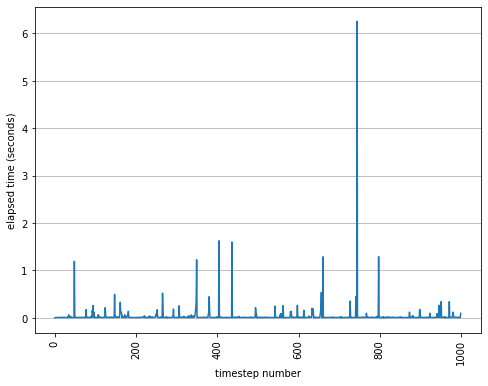

In [8]:
user1_plot_event_num = user1[:1000]
plt.figure(figsize=(8,6))
plt.grid(visible=True, axis='y')
plt.xticks(rotation=90)
plt.xlabel(xlabel='timestep number')
plt.ylabel(ylabel='elapsed time (seconds)')
plt.plot(range(len(user1_plot_event_num)), user1_plot_event_num['delta_time'].to_numpy())

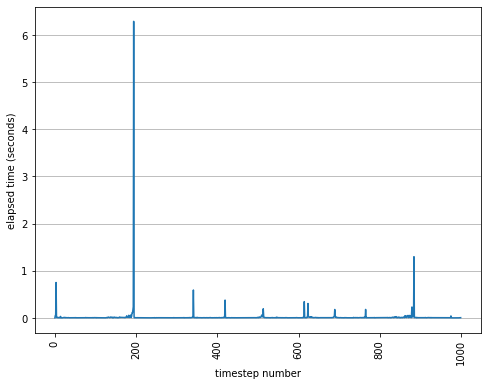

In [9]:
user2_plot_event_num = user2[:1000]
plt.figure(figsize=(8,6))
plt.grid(visible=True, axis='y')
plt.xticks(rotation=90)
plt.xlabel(xlabel='timestep number')
plt.ylabel(ylabel='elapsed time (seconds)')
plt.plot(range(len(user2_plot_event_num)), user2_plot_event_num['delta_time'].to_numpy())

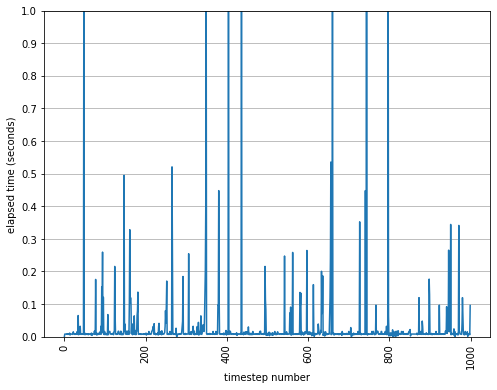

In [10]:
user_plot_event_num = user1[:1000]
plt.figure(figsize=(8,6))
plt.grid(visible=True, axis='y')
plt.xticks(rotation=90)
plt.yticks(ticks=[0.1 * x for x in range(20)])
plt.ylim([0, 1])
plt.xlabel(xlabel='timestep number')
plt.ylabel(ylabel='elapsed time (seconds)')
plt.plot(range(len(user_plot_event_num)), user_plot_event_num['delta_time'].to_numpy())

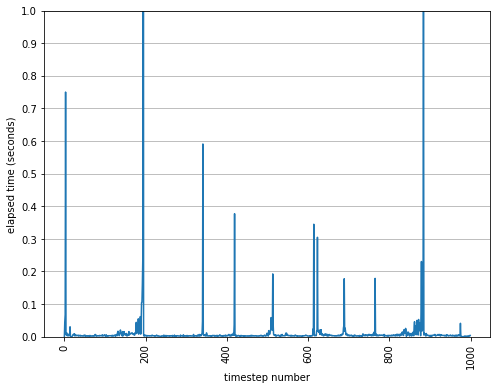

In [11]:
user_plot_event_num = user2[:1000]
plt.figure(figsize=(8,6))
plt.grid(visible=True, axis='y')
plt.xticks(rotation=90)
plt.yticks(ticks=[0.1 * x for x in range(20)])
plt.ylim([0, 1])
plt.xlabel(xlabel='timestep number')
plt.ylabel(ylabel='elapsed time (seconds)')
plt.plot(range(len(user_plot_event_num)), user_plot_event_num['delta_time'].to_numpy())

In [12]:
bin_count = 100

delta_time
(-231.178, 2311.455]      844219
(2311.455, 4622.94]            0
(4622.94, 6934.425]            0
(6934.425, 9245.91]            0
(9245.91, 11557.394]           0
(11557.394, 13868.879]         0
(13868.879, 16180.364]         0
(16180.364, 18491.849]         0
(18491.849, 20803.334]         0
(20803.334, 23114.819]         0
Name: count, dtype: int64
delta_time
(-231.178, 2.282]     841407
(2.282, 4.593]          1485
(4.593, 6.905]           516
(6.905, 9.216]           205
(9.216, 11.528]          111
(11.528, 13.839]          78
(13.839, 16.15]           56
(16.15, 18.462]           44
(18.462, 20.773]          30
(20.773, 23.085]          23
(23.085, 25.396]          18
(25.396, 27.708]          17
(27.708, 30.019]          10
(30.019, 32.331]          15
(32.331, 34.642]          15
(34.642, 36.954]          11
(36.954, 39.265]           8
(39.265, 41.577]          11
(41.577, 43.888]           7
(43.888, 46.2]             3
(46.2, 48.511]             5
(48.511, 50.8

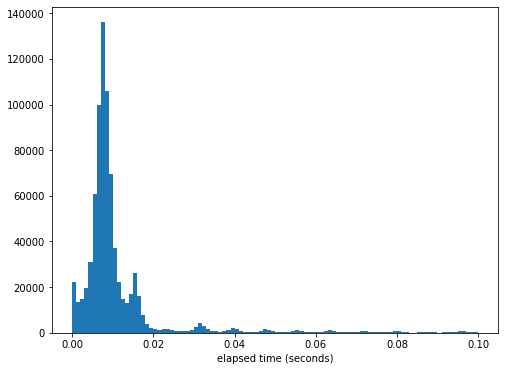

In [13]:
#user1.hist(column=['delta_time'], bins=bin_count, range=[0, 0.1], density=True)

plt.figure(figsize=(8,6))
plt.hist(user1['delta_time'], bins=bin_count, range=[0, 0.1])
plt.xlabel(xlabel='elapsed time (seconds)')


bins = pd.cut(user1['delta_time'], bin_count).value_counts().sort_index()
print(bins.head(10))

bins_more = pd.cut(user1['delta_time'], bin_count*1000).value_counts().sort_index()
print(bins_more.head(50))

delta_time
(-255.316, 2553.162]      4272851
(2553.162, 5106.325]            1
(5106.325, 7659.487]            1
(7659.487, 10212.649]           0
(10212.649, 12765.811]          0
(12765.811, 15318.974]          0
(15318.974, 17872.136]          0
(17872.136, 20425.298]          0
(20425.298, 22978.46]           0
(22978.46, 25531.623]           0
Name: count, dtype: int64


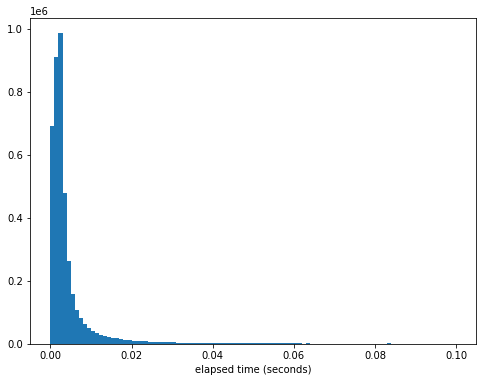

In [14]:
#user2.hist(column=['delta_time'], bins=bin_count, range=[0, 0.1], density=True)

plt.figure(figsize=(8,6))
plt.hist(user2['delta_time'], bins=bin_count, range=[0, 0.1])
plt.xlabel(xlabel='elapsed time (seconds)')

bins = pd.cut(user2['delta_time'], bin_count).value_counts().sort_index()
print(bins.head(10))

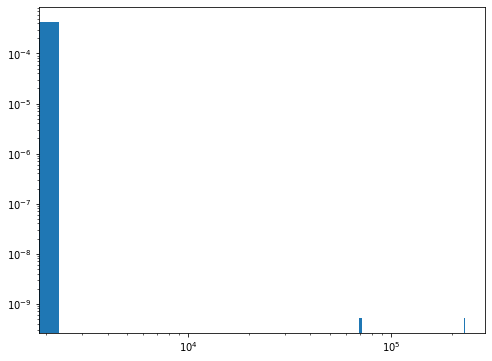

In [15]:
fig = plt.figure(figsize=(8,6))
ax  = fig.add_subplot(111)
ax.hist(user1['delta_time'], bins=bin_count, density=True)
#x = np.linspace(ss.powerlaw.ppf(0.01, 1), ss.powerlaw.ppf(0.99, 1), 1000)
#ax.plot(x, ss.powerlaw.pdf(x, 0.0000001), lw=1)
#print(np.log(user2['delta_time'].max()))
#print(np.logspace(start=0, stop=np.log(user2['delta_time'].max()), num=bin_count*10, base=np.e))
#bins = pd.cut(user2['delta_time'], bin_count).value_counts().sort_index()
#print(bins.head(10))
#plt.xlim([0, 50000])

ax.set_yscale('log')
ax.set_xscale('log')

plt.show()

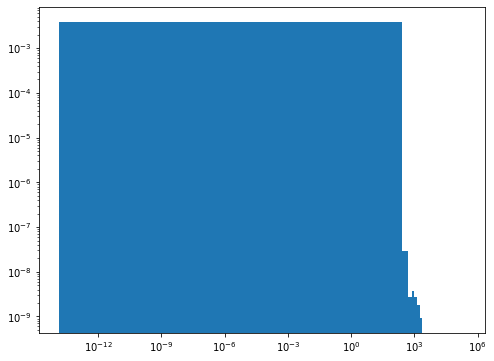

In [16]:
fig = plt.figure(figsize=(8,6))
ax  = fig.add_subplot(111)
ax.hist(user2['delta_time'], bins=bin_count*10, density=True)
#x = np.linspace(ss.powerlaw.ppf(0.01, 1), ss.powerlaw.ppf(0.99, 1), 1000)
#ax.plot(x, ss.powerlaw.pdf(x, 0.0000001), lw=1)
#print(np.log(user2['delta_time'].max()))
#print(np.logspace(start=0, stop=np.log(user2['delta_time'].max()), num=bin_count*10, base=np.e))
#bins = pd.cut(user2['delta_time'], bin_count).value_counts().sort_index()
#print(bins.head(10))
#plt.xlim([0, 50000])

ax.set_yscale('log')
ax.set_xscale('log')

plt.show()